In [1]:
!pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:0031m11.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:01:01


In [2]:
!jt -t onedork -cellw 88% -T

# Preparação dos dados

In [2]:
import pandas as pd

# Lê o arquivo .csv
df = pd.read_csv('ge_news.csv')

# Exibe as primeiras linhas
df.head()

,date,time,title,text,link,club
0,10/11/2022,19h55,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,https://ge.globo.com/futebol/copa-do-mundo/not...,athletico-pr
1,22/12/2017,10h04,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,https://globoesporte.globo.com/futebol/liberta...,athletico-pr
2,11/02/2018,08h00,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
3,18/12/2020,12h48,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
4,13/09/2018,22h17,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr


In [3]:
# Removendo simultaneamente as colunas de índice 0, 1, 4 (date, time and link)
column_indices = [0, 1, 4]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [4]:
df.head()

,title,text,club
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr


In [5]:
# Fundindo colunas 'title' e 'text' para a coluna 'title_and_text'
df['data'] = df['title'] + ' ' + df['text']

In [6]:
df.head()

,title,text,club,data
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr,Convocados do Uruguai para a Copa do Mundo 202...
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr,Conmebol divulga tabela detalhada da pré e da ...
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr,"Com assistência, Demethryus recebe elogios no ..."
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr,Athletico confirma fim de contrato com Welling...
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr,"Alô, cartoleiros! Atlético-PR passa limpo cont..."


In [7]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Fitting the encoder and transforming the 'Animals' column
df['label'] = le.fit_transform(df['club'])

In [8]:
# Removendo as três colunas originais, não precisamos mais delas
column_indices = [0, 1, 2]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [9]:
df.head()

,data,label
0,Convocados do Uruguai para a Copa do Mundo 202...,0
1,Conmebol divulga tabela detalhada da pré e da ...,0
2,"Com assistência, Demethryus recebe elogios no ...",0
3,Athletico confirma fim de contrato com Welling...,0
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...",0


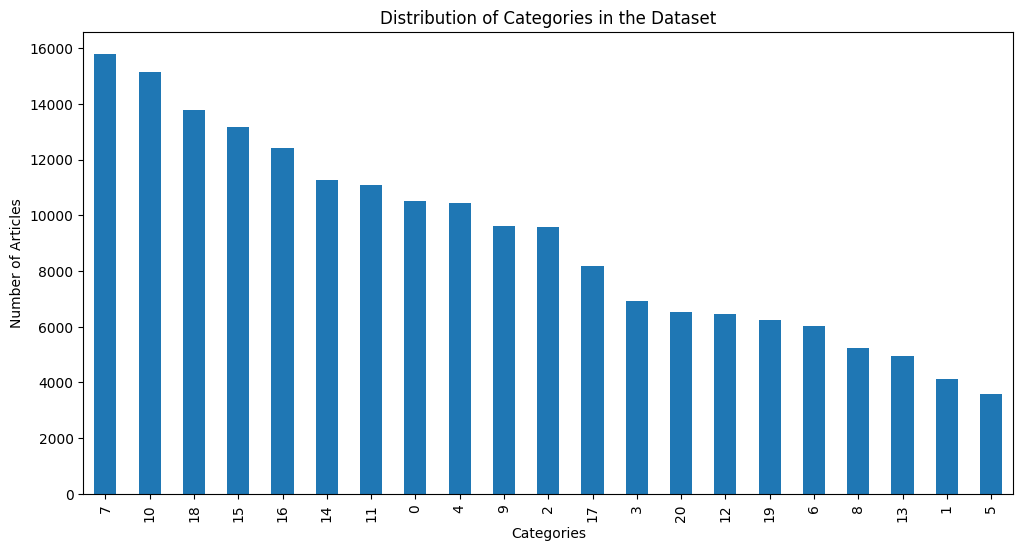

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `ds` and has columns 'data' and 'label'
category_counts = df['label'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of Categories in the Dataset')
plt.show()

# Pré-processamento

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/lucas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/lucas/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lucas/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
import string
from collections import defaultdict
from tqdm import tqdm

tqdm.pandas()

def preprocess_text(df, text_column):
    """
    Realiza o pré-processamento dos dados de texto em um DataFrame do Pandas.
    Remove pontuação, palavras comuns (stop words) e aplica lematização.
    """
    
    # Cria uma tabela de tradução que mapeia cada caractere de pontuação do módulo `string.punctuation` 
    # para `None` (ou seja, remove-os do texto).
    print("Removendo pontuação...")
    translator = str.maketrans('', '', string.punctuation) 
    df[text_column] = df[text_column].progress_apply(lambda x: x.translate(translator))
        
    # Usa o método `apply()` do Pandas DataFrame para aplicar o tokenizador `word_tokenize()` do NLTK 
    # a cada elemento da coluna `text_column` especificada em `df_clean` após converter cada elemento 
    # para letras minúsculas.
    print("Aplicando tokenização...")
    df[text_column] = df[text_column].progress_apply(lambda x: word_tokenize(x.lower()))

    # Remove palavras comuns (stop words)
    print("Removendo stopwords...")
    stop_words = set(stopwords.words('portuguese'))
    df[text_column] = df[text_column].progress_apply(lambda x: [word for word in x if word not in stop_words])
       
    def get_wordnet_pos(tag):
        """
        Mapeia a tag POS (classe gramatical) para o primeiro caractere usado pelo WordNetLemmatizer
        """
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def lemmatize_words(words):
        lemmatizer = WordNetLemmatizer()
        pos_tagged_words = nltk.pos_tag(words)
        return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged_words]
    
    # Retorna o valor correspondente à tag POS da palavra, usando o dicionário de mapeamento criado acima
    print("Computando Lematização...")
    df[text_column] = df[text_column].progress_apply(lemmatize_words)

    #return df_clean
    
preprocess_text(df, 'data')

Removendo pontuação...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191005/191005 [00:24<00:00, 7761.57it/s]


Aplicando tokenização...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191005/191005 [02:41<00:00, 1185.53it/s]


Removendo stopwords...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191005/191005 [00:07<00:00, 26689.10it/s]


Computando Lematização...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191005/191005 [28:07<00:00, 113.16it/s]


In [1]:
# Salvar em formato pickle
df.to_pickle("ge.pkl")

df

NameError: name 'df' is not defined

In [1]:
import pandas as pd

df = pd.read_pickle("ge.pkl")

# Treinando modelo Word2vec

In [2]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [3]:
# Custom callback class for Word2Vec training
class SimpleTextCallback(CallbackAny2Vec):
    def __init__(self, total_epochs):
        self.epoch = 0
        self.total_epochs = total_epochs

    def on_epoch_end(self, model):
        self.epoch += 1
        print(f"Epoch {self.epoch} of {self.total_epochs} completed.")

In [4]:
# Extract tokenized documents from the 'data' column
preprocessed_articles = df['data'].tolist()

In [22]:
# Initialize the Word2Vec model
word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Build the vocabulary
word2vec_model.build_vocab(preprocessed_articles)

# Train the Word2Vec model with the custom progress update
total_epochs = 10
callback = SimpleTextCallback(total_epochs)
word2vec_model.train(preprocessed_articles, total_examples=word2vec_model.corpus_count, 
                     epochs=total_epochs, callbacks=[callback])

Epoch 1 of 10 completed.
Epoch 2 of 10 completed.
Epoch 3 of 10 completed.
Epoch 4 of 10 completed.
Epoch 5 of 10 completed.
Epoch 6 of 10 completed.
Epoch 7 of 10 completed.
Epoch 8 of 10 completed.
Epoch 9 of 10 completed.
Epoch 10 of 10 completed.


(445940014, 455234750)

In [7]:
from gensim.models import Word2Vec

# Load the Word2Vec model from the file
word2vec_model = Word2Vec.load("word2vec_model.model")

In [8]:
# Find words most similar to target word
word2vec_model.wv.most_similar('flamengo')

[('fluminense', 0.8884649276733398),
 ('palmeiras', 0.8508396148681641),
 ('botafogo', 0.8110420107841492),
 ('atléticomg', 0.7962134480476379),
 ('grêmio', 0.7954407930374146),
 ('vasco', 0.7945719361305237),
 ('corinthian', 0.7738872766494751),
 ('internacional', 0.7214665412902832),
 ('corinthians', 0.7203207015991211),
 ('fla', 0.7034094929695129)]

In [9]:
# Create word-to-index and index-to-word dictionaries
word_to_index = {}
index_to_word = {}
for i, word in enumerate(word2vec_model.wv.index_to_key):
    word_to_index[word] = i + 1
    index_to_word[i + 1] = word

In [10]:
from tqdm import tqdm

# Convert tokenized news into sequences of indices
sequences = []
for tokens in tqdm(preprocessed_articles):
    sequence = []
    for token in tokens:
        if token in word_to_index:
            sequence.append(word_to_index[token])
    sequences.append(sequence)

100%|████████████████████████████████| 191005/191005 [00:10<00:00, 17447.03it/s]


In [11]:
# Map the sequence of indices in sequences[0] back to a text representation
text = " ".join([index_to_word[i] for i in sequences[0]])

# Print the resulting text representation
print(text)

convocados uruguai copa mundo 2022 veja lista técnico diego alonso divulgou lista 26 convocados uruguai copa mundo ídolos veteranos atacantes cavani suárez puxam elenco celeste ainda arrascaeta flamengo jovens valverde real madrid darwin núñez liverpool símbolos renovação alonso optou manter zagueiro ronald araújo barcelona lista defensor recupera lesão coxa joga desde fim setembro expectativa inicial poderia voltar jogar 2023 veja anúncio convocados uruguai copa mundo além arrascaeta outros doi jogadores atuam brasil chamados diego alonso lateral varela flamengo atacante canobbio athleticopr outros conhecidos torcida brasileira lista veterano zagueiro diego godín exatléticomg atualmente vélez sarsfield lateral matías viña expalmeiras atualmente rom uruguai vai terminar preparação copa mundo abu dhabi emirados árabes onde parte delegação desembarcou nesta quintafeira ida catar ocorre próximo dia 19 celeste grupo h copa lado portugal coreia sul gana estreia contra sulcoreanos dia 24 est

In [12]:
import numpy as np

# Compute the length of each sequence in the dataset
sequence_lengths = [len(seq) for seq in sequences]

# Compute the mean and maximum sequence length
mean_length = np.mean(sequence_lengths)
max_length = max(sequence_lengths)

print("Mean sequence length: ", mean_length)
print("Maximum sequence length: ", max_length)

Mean sequence length:  238.3365618701081
Maximum sequence length:  5411


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length
max_length = int(mean_length) * 3

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

2023-03-29 22:47:20.964654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 22:47:22.345058: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lucas/miniconda3/envs/tf/lib/
2023-03-29 22:47:22.345133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lucas/miniconda3/envs/tf/lib/
2023-03-29 22:47:22.345140: W tensorflow/compiler/tf2ten

In [29]:
# Get the total number of unique values in the 'labels' column of the dataframe
df['label'].nunique()

21

In [14]:
import tensorflow.keras.utils as ku

# Convert labels to one-hot encoded vectors
num_classes = 21
labels = ku.to_categorical(df['label'], num_classes)

In [31]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

# GPU

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-03-29 22:47:24.420779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 22:47:24.425950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 22:47:24.426123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Create LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word2vec_model.wv.key_to_index) + 1, 
                    output_dim=word2vec_model.vector_size, input_length=max_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=len(labels[0]), activation='softmax'))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

2023-03-29 22:47:33.457795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 22:47:33.458322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 22:47:33.458538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 22:47:33.458665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

Epoch 1/30


2023-03-29 22:47:36.749489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-29 22:47:37.033942: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6610091c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 22:47:37.033970: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1070 Ti, Compute Capability 6.1
2023-03-29 22:47:37.039560: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-29 22:47:37.149511: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2388/2388 [==============================] - 260s 108ms/step - loss: 2.9699 - accuracy: 0.0816 - val_loss: 2.9693 - val_accuracy: 0.0782
Epoch 2/30
2388/2388 [==============================] - 189s 79ms/step - loss: 2.9651 - accuracy: 0.0823 - val_loss: 2.9641 - val_accuracy: 0.0798
Epoch 3/30
2388/2388 [==============================] - 177s 74ms/step - loss: 2.5632 - accuracy: 0.1882 - val_loss: 2.1476 - val_accuracy: 0.3023
Epoch 4/30
2388/2388 [==============================] - 178s 75ms/step - loss: 1.1677 - accuracy: 0.6632 - val_loss: 0.8797 - val_accuracy: 0.7679
Epoch 5/30
2388/2388 [==============================] - 176s 74ms/step - loss: 0.7716 - accuracy: 0.7916 - val_loss: 0.7722 - val_accuracy: 0.7870
Epoch 6/30
2388/2388 [==============================] - 175s 73ms/step - loss: 0.6678 - accuracy: 0.8118 - val_loss: 0.7218 - val_accuracy: 0.7959
Epoch 7/30
2388/2388 [==============================] - 175s 73ms/step - loss: 0.6031 - accuracy: 0.8240 - val_loss: 0.7415 - va

In [66]:
model.save('ge_lstm.h5')
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
#np.save("labels.npy", labels)

In [67]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('ge_lstm.h5')
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
#labels = np.load("labels.npy")

# Avaliação de Resultados

In [68]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia final:', accuracy)

Acurácia final: 0.7945865392684937


In [69]:
# Fazer as previsões do modelo para o conjunto de teste
y_pred = model.predict(X_test)

1194/1194 [==============================] - 22s 18ms/step


In [70]:
#Transformar as previsões de volta em rótulos
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calcular a matriz de confusão
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

conf_mat

array([[1674,    8,   16,    3,   15,    8,    7,   24,   67,    7,   30,
          29,   26,   45,   25,    9,   26,    2,   21,    3,    4],
       [   8,  584,    7,    2,   11,    3,    4,   16,    5,    5,    7,
          20,   16,  116,   19,    8,    3,    3,    4,    4,    6],
       [  28,    3, 1604,    2,   13,    3,    5,   29,    4,   69,   13,
          41,   23,   36,   17,    8,   17,    3,   13,   10,   11],
       [  16,    1,    3, 1088,   20,    7,   14,   19,    2,    4,   12,
          33,   24,   30,   24,    7,   10,    2,   12,   25,   16],
       [  25,    3,   19,    7, 1660,    0,    6,   25,    3,   12,   44,
          88,   12,   49,   15,    5,   26,    6,   36,    8,   44],
       [  13,    7,    3,    3,    2,  526,    5,   32,    4,    3,    2,
          20,   22,   48,    9,    0,   20,    2,   11,    3,    5],
       [  15,    5,    9,    9,    7,    8,  840,   14,    2,    5,    8,
          35,  111,   35,   19,    6,   10,    4,   12,   18,    9],

In [71]:
import pandas as pd

classes = df['label'].nunique()

# Lê o arquivo .csv
df = pd.read_pickle("ge.pkl")

df.shape[0]

191005

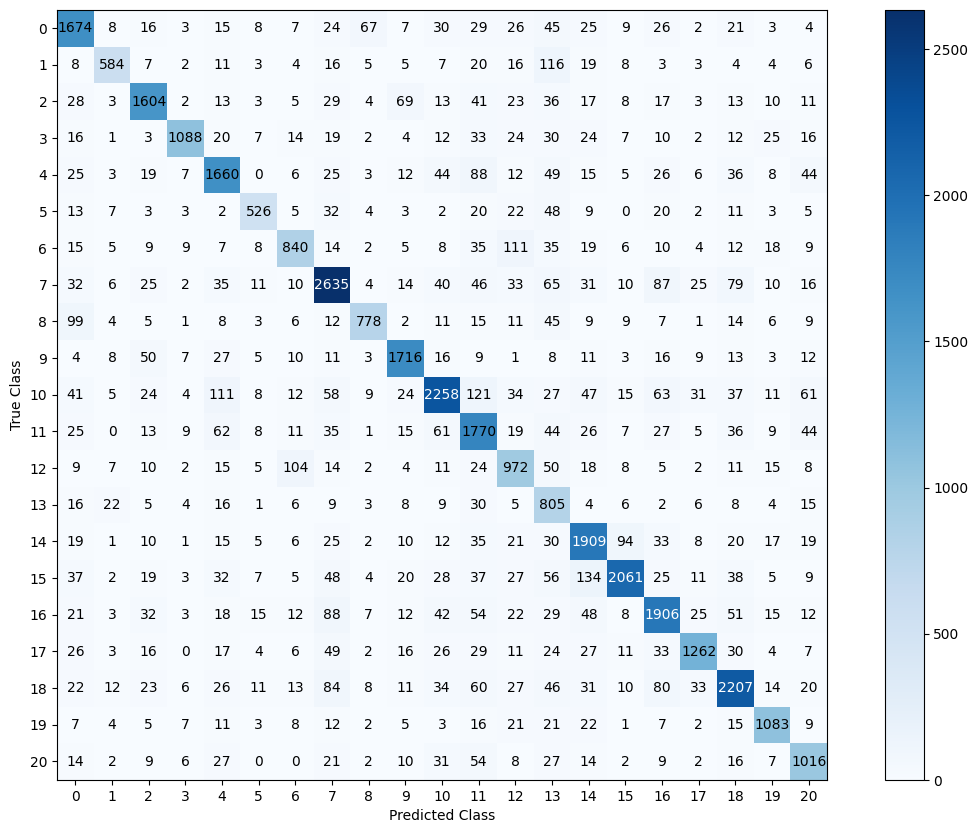

In [72]:
import matplotlib.pyplot as plt

# Define size of the figure
plt.figure(figsize=(15, 10))

# Define colormap
cmap = plt.cm.Blues

# Plot confusion matrix
plt.imshow(conf_mat, cmap=cmap)
plt.colorbar()

# Add labels to matrix
plt.xticks([int(i) for i in range(21)], [str(i) for i in range(21)])
plt.yticks([int(i) for i in range(21)], [str(i) for i in range(21)])

for i in range(classes):
    for j in range(classes):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true_labels)/ classes else 'black')

# Add axis labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Show plot
plt.show()

In [84]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall and f1-score for each class
precisions = []
recalls = []
f1_scores = []
for i in range(classes):
    precision = precision_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    recall = recall_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    f1 = f1_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Print results
for i in range(classes):
    print(f"Class '{i}': Precision={precisions[i]:.4f}, Recall={recalls[i]:.4f}, F1-Score={f1_scores[i]:.4f}")


Class '0': Precision=0.7782, Recall=0.8170, F1-Score=0.7971
Class '1': Precision=0.8464, Recall=0.6863, F1-Score=0.7579
Class '2': Precision=0.8411, Recall=0.8217, F1-Score=0.8313
Class '3': Precision=0.9307, Recall=0.7947, F1-Score=0.8574
Class '4': Precision=0.7728, Recall=0.7931, F1-Score=0.7828
Class '5': Precision=0.8206, Recall=0.7108, F1-Score=0.7618
Class '6': Precision=0.7706, Recall=0.7113, F1-Score=0.7398
Class '7': Precision=0.8083, Recall=0.8193, F1-Score=0.8138
Class '8': Precision=0.8512, Recall=0.7374, F1-Score=0.7902
Class '9': Precision=0.8702, Recall=0.8836, F1-Score=0.8769
Class '10': Precision=0.8369, Recall=0.7524, F1-Score=0.7924
Class '11': Precision=0.6898, Recall=0.7948, F1-Score=0.7386
Class '12': Precision=0.6722, Recall=0.7500, F1-Score=0.7090
Class '13': Precision=0.4921, Recall=0.8181, F1-Score=0.6145
Class '14': Precision=0.7763, Recall=0.8329, F1-Score=0.8036
Class '15': Precision=0.9008, Recall=0.7903, F1-Score=0.8419
Class '16': Precision=0.7902, Reca

## Referências

* https://www.kaggle.com/datasets/lgmoneda/ge-soccer-clubs-news
* https://medium.com/@everton.tomalok/word2vec-e-sua-import%C3%A2ncia-na-etapa-de-pr%C3%A9-processamento-d0813acfc8ab
* https://www.youtube.com/watch?v=hQwFeIupNP0
* https://www.youtube.com/watch?v=ISPId9Lhc1g
* https://jalammar.github.io/illustrated-word2vec/
* https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92